In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import joblib
import itertools
import subprocess
from time import time
from scipy import stats
import scipy.optimize as opt  
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


In [2]:
# READ DATA
data = pd.read_csv("~/Downloads/Employee Attrition.csv") 
data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [3]:
# GETTING THE DIMENSIONS OF THE ARRAY
data.shape


(7000, 24)

In [4]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE FIRST XXX ENTRIES OF THE DATA
data.head(10)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
6,EID_18588,F,21.0,4,Married,Springfield,Purchasing,Directive,2.0,1,...,type2,2.0,3,-0.9612,0.7075,2.0,3,7,3,0.2819
7,EID_1235,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,...,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
8,EID_10197,M,40.0,4,Single,Springfield,Production,Analytical,13.0,1,...,type0,4.0,1,NaN,1.8688,2.0,5,6,3,0.1968
9,EID_21262,M,45.0,3,Married,Lebanon,IT,Directive,21.0,4,...,type3,4.0,3,0.7516,-0.4537,2.0,4,8,3,0.2870


In [5]:
data.tail(10)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
6990,EID_20545,M,22.0,4,Married,Lebanon,Logistics,Analytical,3.0,3,...,type3,3.0,3,1.6081,0.7075,3.0,2,8,2,0.2523
6991,EID_17275,M,26.0,5,Married,Franklin,Accounting and Finance,Conceptual,2.0,2,...,type2,2.0,2,0.7516,0.7075,2.0,4,6,3,0.2265
6992,EID_19922,F,26.0,1,Married,Franklin,Accounting and Finance,Analytical,4.0,2,...,type2,1.0,1,-0.1048,0.7075,2.0,3,8,3,0.2238
6993,EID_12529,M,33.0,4,Married,Franklin,Logistics,Directive,7.0,4,...,type3,2.0,3,-0.1048,-0.4537,2.0,4,7,3,0.2569
6994,EID_11159,M,33.0,3,Married,Springfield,Accounting and Finance,Behavioral,9.0,3,...,type2,4.0,4,-0.1048,1.8688,2.0,4,7,2,0.0480
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162
6999,EID_1640,F,58.0,3,Married,Franklin,IT,Directive,22.0,2,...,type2,3.0,3,-0.1048,-1.6150,3.0,4,5,3,0.0910


In [6]:
#checking for null values
data.isnull().sum()


Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [7]:
data['Age'].replace([np.nan], data['Age'].mean(), inplace=True)
data['Time_of_service'].replace([np.nan], data['Time_of_service'].mean(), inplace=True)
data['Work_Life_balance'].replace([np.nan], data['Work_Life_balance'].mean(), inplace=True)
data['Pay_Scale'].replace([np.nan], data['Pay_Scale'].mean(), inplace=True)
data['VAR2'].replace([np.nan], data['VAR2'].mean(), inplace=True)
data['VAR4'].replace([np.nan], data['VAR4'].mean(), inplace=True)

In [8]:
data.head(10)
data.isnull().sum()


Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

<ipython-input-9-e4abad6c6a99>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=ax, bins = 30)


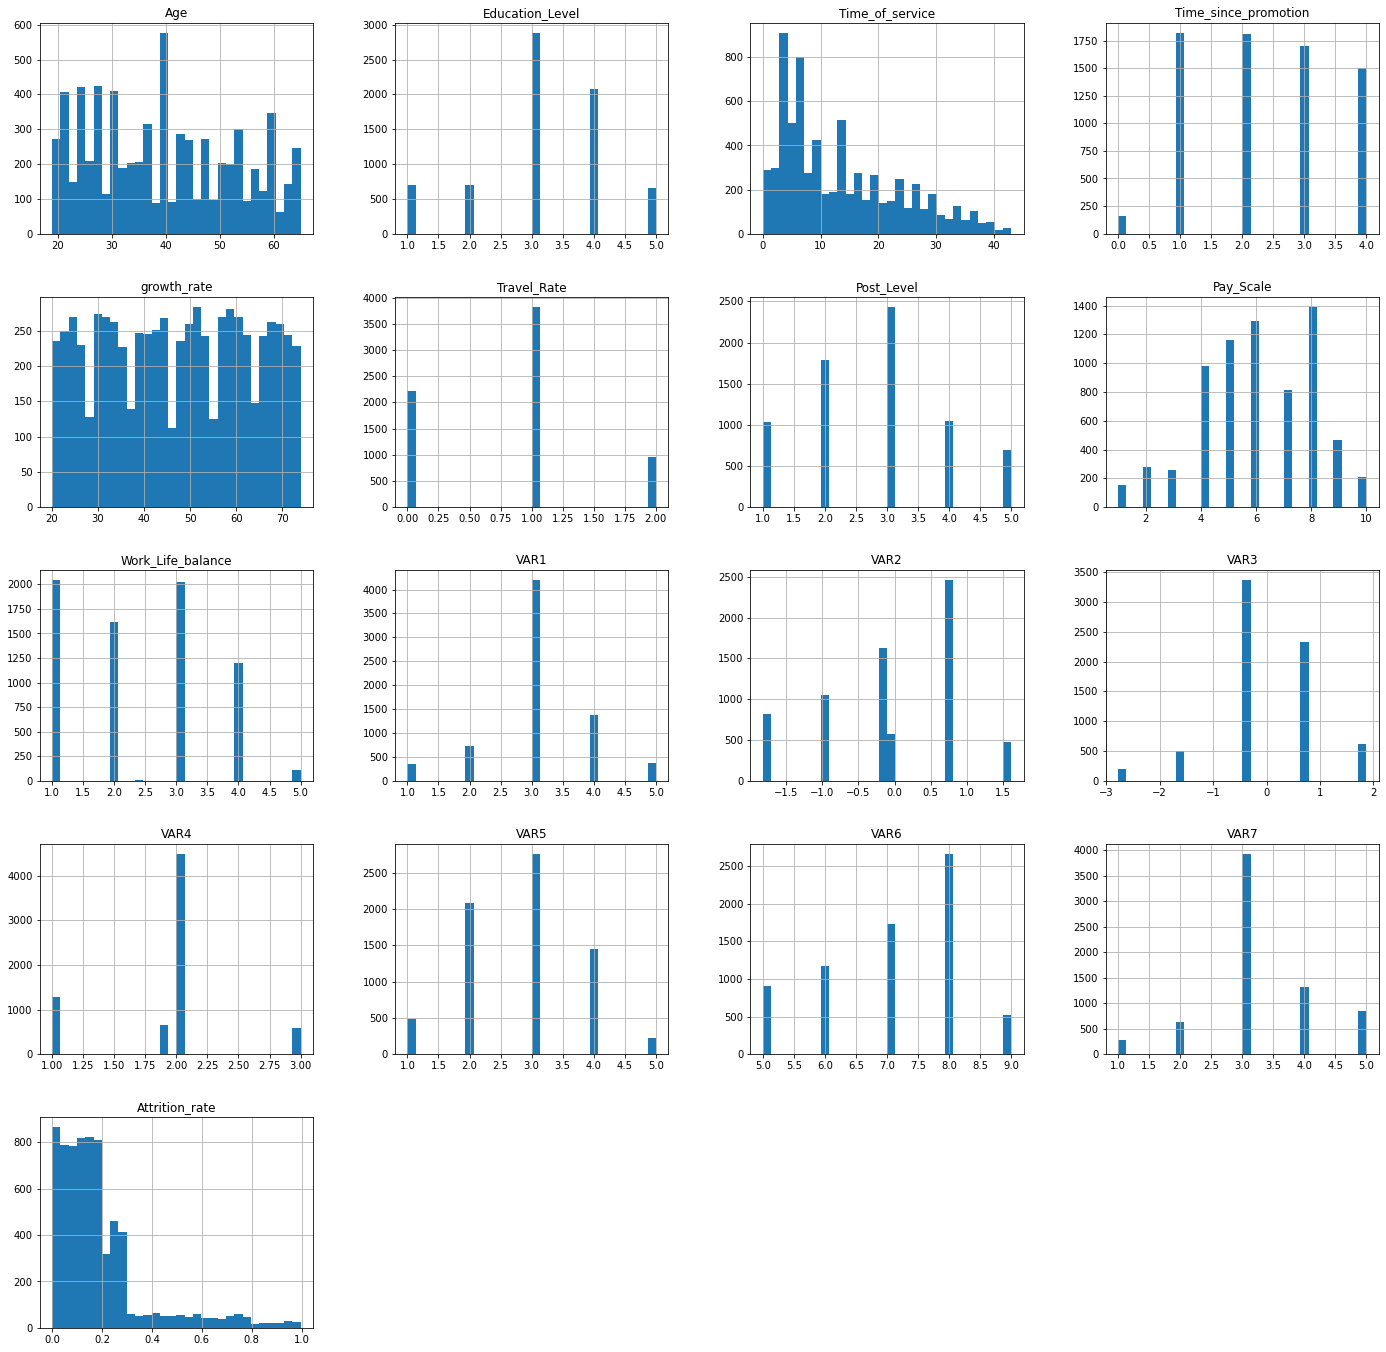

In [9]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES
fig = plt.figure(figsize=(24,24))
ax = fig.gca()
data.hist(ax=ax, bins = 30)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split


#data.head()

In [11]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Relationship_Status']= label_encoder.fit_transform(data['Relationship_Status'])
  
data['Relationship_Status'].unique()

array([0, 1])

In [12]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Hometown']= label_encoder.fit_transform(data['Hometown'])
  
data['Hometown'].unique()

array([1, 3, 0, 2, 4])

In [13]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Unit']= label_encoder.fit_transform(data['Unit'])
  
data['Unit'].unique()

array([ 2,  3,  8,  1,  7, 10,  6,  5,  0,  4,  9, 11])

In [14]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Decision_skill_possess']= label_encoder.fit_transform(data['Decision_skill_possess'])
  
data['Decision_skill_possess'].unique()

array([2, 0, 1, 3])

In [15]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Compensation_and_Benefits']= label_encoder.fit_transform(data['Compensation_and_Benefits'])
  
data['Compensation_and_Benefits'].unique()

array([2, 3, 0, 4, 1])

In [16]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Gender']= label_encoder.fit_transform(data['Gender'])
  
data['Gender'].unique()

array([0, 1])

In [17]:
data.head(10)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,0,42.000000,4,0,1,2,2,4.0,4,...,2,3.0,4,0.751600,1.8688,2.000000,4,5,3,0.1841
1,EID_18000,1,24.000000,3,1,3,3,0,5.0,4,...,2,4.0,3,-0.961200,-0.4537,2.000000,3,5,3,0.0670
2,EID_3891,0,58.000000,3,0,0,8,2,27.0,3,...,2,1.0,4,-0.961200,-0.4537,3.000000,3,8,3,0.0851
3,EID_17492,0,26.000000,3,1,2,1,1,4.0,3,...,2,1.0,3,-1.817600,-0.4537,1.891078,3,7,3,0.0668
4,EID_22534,0,31.000000,1,0,3,3,2,5.0,4,...,3,3.0,1,0.751600,-0.4537,2.000000,2,8,2,0.1827
5,EID_2278,1,54.000000,3,0,2,7,2,19.0,1,...,2,1.0,3,-1.817600,1.8688,2.000000,2,8,3,0.7613
6,EID_18588,0,21.000000,4,0,3,7,3,2.0,1,...,2,2.0,3,-0.961200,0.7075,2.000000,3,7,3,0.2819
7,EID_1235,0,39.622799,3,0,3,10,3,34.0,4,...,3,2.0,3,-0.104800,-0.4537,2.000000,3,9,3,0.1169
8,EID_10197,1,40.000000,4,1,3,6,0,13.0,1,...,0,4.0,1,-0.008126,1.8688,2.000000,5,6,3,0.1968
9,EID_21262,1,45.000000,3,0,2,2,3,21.0,4,...,3,4.0,3,0.751600,-0.4537,2.000000,4,8,3,0.2870


In [18]:
data.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   int64  
 2   Age                        7000 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   int64  
 5   Hometown                   7000 non-null   int64  
 6   Unit                       7000 non-null   int64  
 7   Decision_skill_possess     7000 non-null   int64  
 8   Time_of_service            7000 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  7000 non-null   float

In [61]:
#threshold = 0.5
#y = y.apply(lambda x: 1 if x>threshold else 0)
#data.head(10)
#print(y)
X = data[['Gender', 'Age', 'Education_Level','Time_of_service','Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7']]
y = data[['Attrition_rate']]
y.head()

,Attrition_rate
0,0.1841
1,0.0670
2,0.0851
3,0.0668
4,0.1827


In [62]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.70, random_state=1)
y_test.head()


,Attrition_rate
2305,0.1642
4388,0.0760
1686,0.2246
4945,0.3232
4197,0.1808


<ipython-input-63-8afb75226990>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


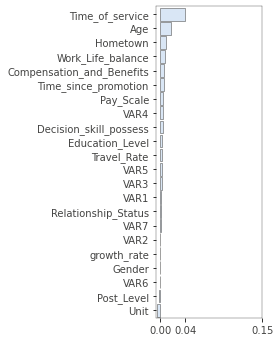

In [63]:
import rfpimp
from rfpimp import importances, plot_importances
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

imp = importances(rf, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()

<ipython-input-64-b5523c94a915>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


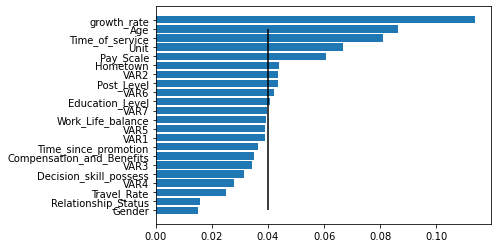

[0.01504078 0.08640825 0.04077319 0.08094051 0.01559606 0.04398675
 0.06690305 0.03144962 0.03632293 0.11378627 0.02504109 0.04342708
 0.06072361 0.03515341 0.03929595 0.03874741 0.04345789 0.03437556
 0.02773333 0.03894575 0.04229007 0.03960142]


In [64]:
from sklearn.inspection import permutation_importance
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.vlines(0.04, 0, 20, linestyles ="solid", colors ="k")
plt.show()
print(rf.feature_importances_)

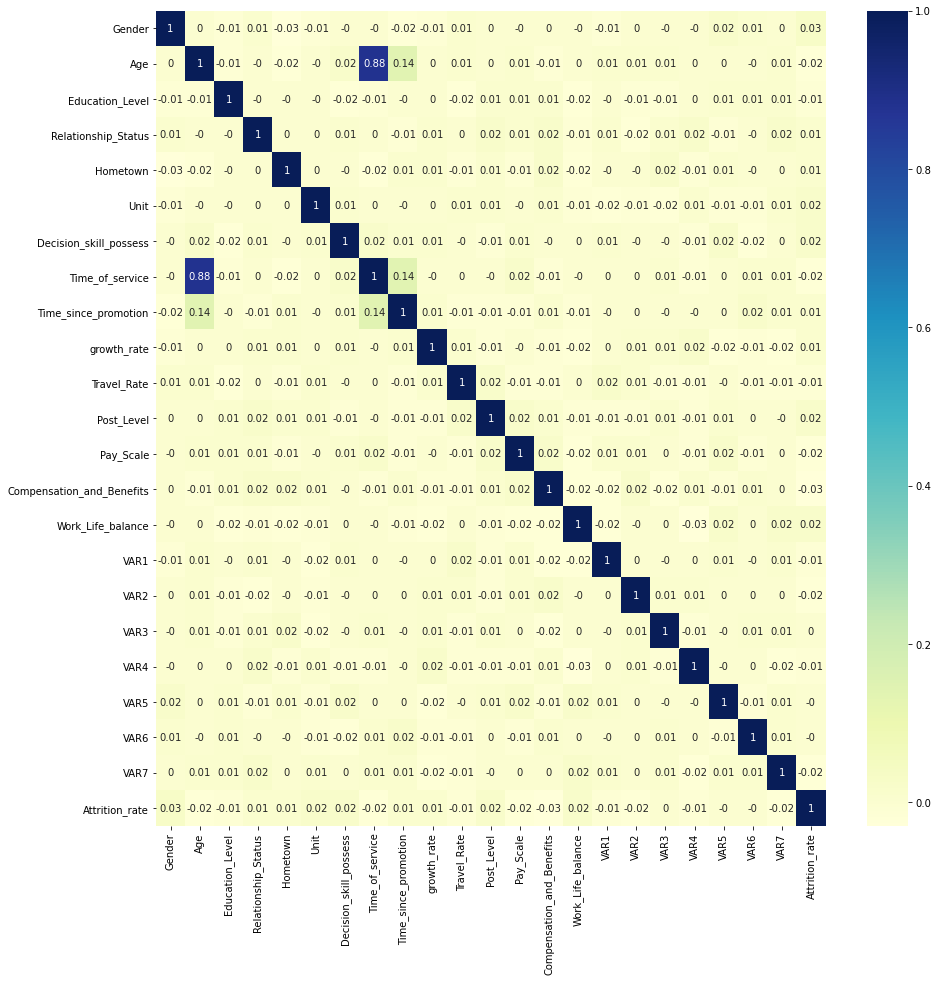

In [65]:
# library
import seaborn as sns
import pandas as pd
import numpy as np

# Create a dataset
#df = pd.DataFrame(data, columns=["growth_rate","Age","Time_of_service","Unit","Pay_Scale","VAR2","Post_Level","Hometown","VAR6","VAR1"])

# Default heatmap
#p1 = sns.heatmap(df)

# # Draw a heatmap with the numeric values in each cell
# p1= sns.heatmap(X, annot=True)

#columns=["growth_rate","Age","Time_of_service","Unit","Pay_Scale","VAR2","Post_Level","Hometown","VAR6","VAR1"]
# Use the heatmap function from the seaborn package
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(data.corr().round(2), cmap="YlGnBu", annot=True);

# Display the Pharma Sector Heatmap
plt.show()

In [69]:
# max(X[])
# Segregate features and labels into separate variables
X = data[['Gender', 'Age', 'Education_Level','Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7']]  
y_train.head()

,Attrition_rate
1040,0.1740
1074,0.2489
5795,0.1424
6865,0.1038
5965,0.1170


In [70]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.70, random_state=1)
X_test.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_since_promotion,growth_rate,Travel_Rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
2305,1,20.0,4,0,1,10,2,1,35,1,...,9.0,3,3.0,3,-0.1048,0.7075,1.0,3,5,4
4388,0,36.0,2,0,4,9,3,1,29,1,...,4.0,3,3.0,3,-0.1048,-0.4537,2.0,3,8,5
1686,0,52.0,3,1,2,7,1,4,20,2,...,4.0,2,1.0,1,0.7516,-0.4537,2.0,3,7,5
4945,0,47.0,3,1,1,5,0,3,33,1,...,10.0,2,2.0,4,-0.1048,-1.6150,1.0,1,6,5
4197,1,23.0,3,0,2,1,2,4,20,1,...,4.0,2,3.0,5,0.7516,0.7075,2.0,2,5,3


In [71]:
# importing module
from sklearn.linear_model import LinearRegression

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(X_train,y_train)
y_prediction =  LR.predict(X_test)
max(y_prediction)
#y_prediction

array([0.23717233])

In [72]:
#score=100*max(0,1−root_mean_squared_error(actual_values, predictedValues1))
#print("Accuracy of logistic regression classifier: ",score)
MSE = np.square(np.subtract(data['Attrition_rate'],y_prediction)).mean() 
 
import math   
    
RMSE = math.sqrt(MSE)
print("ACCURACY:\n")
print((1-RMSE)*100)



ValueError: Length of passed values is 2100, index implies 7000.

In [103]:
# Predictor Variable - SET THE PREDICTOR VARIBLE (X1) TO ONE OF YOUR CHOICES OF PREDICTOR VARIABLES
X1 = data['Age']
Y = data['Attrition_rate']
print(X1)

0       42.0
1       24.0
2       58.0
3       26.0
4       31.0
        ... 
6995    23.0
6996    44.0
6997    49.0
6998    47.0
6999    58.0
Name: Age, Length: 7000, dtype: float64


In [105]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    beta_1 = n/d
    return beta_1

# Complete the code to calculate the beta1 for X1
beta1 = calculatebeta1(X1,Y)
print(beta1)

In [106]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta0(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    beta0 = Ybar - calculatebeta1(X, Y) * Xbar
    return beta0

In [107]:
# Complete the code to calculate the beta0 for X1
beta0 = calculatebeta0(X1,Y)
beta0

0.19778752749094528

In [108]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatePredictions(x, b0, b1):
    return b0 + b1 * x

In [109]:
# Complete the code to calculate the predictions of values in X1
predictedValues1 = calculatePredictions(X1,beta0,beta1)
predictedValues1

0       0.185456
1       0.190741
2       0.180758
3       0.190154
4       0.188685
          ...   
6995    0.191034
6996    0.184868
6997    0.183400
6998    0.183988
6999    0.180758
Name: Age, Length: 7000, dtype: float64

In [110]:
# Complete the code to calculate the residual for X1
residual = abs(data['Attrition_rate'] - predictedValues1).mean()
residual

0.12564215454250818

In [111]:
#score=100*max(0,1−root_mean_squared_error(actual_values, predictedValues1))
#print("Accuracy of logistic regression classifier: ",score)
MSE = np.square(np.subtract(data['Attrition_rate'],predictedValues1)).mean() 
 
import math   
    
RMSE = math.sqrt(MSE)
print("ACCURACY:\n")
print((1-RMSE)*100)


ACCURACY:

81.42500716610132


In [97]:
# Predictor Variable - SET THE PREDICTOR VARIBLE (X1) TO ONE OF YOUR CHOICES OF PREDICTOR VARIABLES
X2= data['Time_of_service']
Y = data['Attrition_rate']

In [98]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    beta_1 = n/d
    return beta_1

In [99]:
# Complete the code to calculate the beta1 for X1
beta1 = calculatebeta1(X2,Y)
print(beta1)

-0.0002936144922142631


In [84]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatebeta0(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    beta0 = Ybar - calculatebeta1(X, Y) * Xbar
    return beta0

In [85]:
# Complete the code to calculate the beta0 for X1
beta0 = calculatebeta0(X2,Y)
beta0

0.19330617739311992

In [86]:
# DO NOT CHANGE, JUST RUN THE CELL
def calculatePredictions(x, b0, b1):
    return b0 + b1 * x

In [87]:
# Complete the code to calculate the predictions of values in X1
predictedValues2 = calculatePredictions(X1,beta0,beta1)
predictedValues2

0       0.180974
1       0.186259
2       0.176277
3       0.185672
4       0.184204
          ...   
6995    0.186553
6996    0.180387
6997    0.178919
6998    0.179506
6999    0.176277
Name: Age, Length: 7000, dtype: float64

In [88]:
#score=100*max(0,1−root_mean_squared_error(actual_values, predictedValues1))
#print("Accuracy of logistic regression classifier: ",score)
MSE = np.square(np.subtract(data['Attrition_rate'],predictedValues2)).mean() 
 
import math   
    
RMSE = math.sqrt(MSE)
print("ACCURACY:\n")
print((1-RMSE)*100)



ACCURACY:

81.41183170870796
